.

Deep_Learning_TIL(20190720)

study program : https://www.fastcampus.co.kr/data_camp_deeplearning

[학습노트]

- ResNet

![image](https://user-images.githubusercontent.com/41605276/80935442-955c7080-8e07-11ea-8224-b5e667e938f4.png)

레즈넷은 2015년 ILSVRC 대회에서 우승한 모델이다. top-5 error 가 겨우 3.6%로 사람의 분류 수준인 5% 내외를 뛰어 넘었다.

레즈넷은 모티베이션이 레이어가 딥해질수록 성능이 계속 좋아질거냐에 대한 의문이었는데 실제로 레이어가 딥해진다고해서 무조건 성능이 좋아지는 것은 아니었다.

위에 그림에서도 알 수 있듯이 테스트 애러가 56레이어짜리가 더 높다라는 것이 증명되었다. 트레인 애러도 56레이어가 더 높은것이 보여졌는데 트레이닝도 더 잘안된다는 것이 들어났다.

그래서 위에 그림과 같이 18레이어짜리 네트워크를 열심히 학습을 시키고, 그 다음에 34레이어짜리 네트워크를 갖다놓고 파란색 박스부분을 빼놓고 나머지는 같다. 학습을 열심히 시킨 네트워크의 가중치를 34레이어로 옮겨놓고 파란색 박스부분만 랜덤하게 initialize 시킨 다음에 전체 네트워크를 학습을 시작하면 얘네들이 아무것도 안하고 그냥 입력을 받아서 출력을 보내주기만 해도 최소한 18레이어짜리 네트워크 대비해서 성능은 동일하게 나올것이라는 예상을 할 수 있는데 실제로 해보니까 성능이 나빠지는 현상이 생겼다. 

그래서 그냥 전달하는 것 조차도 학습하기가 힘들다. 그냥 identity function(동일인풋 동일 아웃풋) 역할도 잘 안되는 구나라는 것을 알 수 있다. 왜냐하면 상당히 고차원인데 거기에 아이덴티티 매핑을 해주는 솔루션은 딱 하나이고 그 정답을 찾기가 힘들다는 것이다. 

![image](https://user-images.githubusercontent.com/41605276/80935811-55968880-8e09-11ea-9ef9-ec178e8f67cb.png)

그래서 여러가지 아이디어가 있지만, 위에 그림과 같이 아이덴티티 매핑을 강제로 시키게 된다. F(x)에 x를 끌고와서 더해주는 방식이다. 덧셈을 할때는 앨리먼트 와이즈하게 해준다. F(x)와 x가 가로세로 수 그리고 채널 수까지 똑같아야 한다. 이렇게 만든것을 shortcut connection(또는 Residual connection)이라고 불렀다. 

위에 그림에 좌측에는 원래 x가 들어와서 H(x)라는걸로 나왔으면 컨볼루션 2개를 거치는 걸로 학습을 하는 것인데 우측에는 컨볼루션 학습한 것이 F(x)이고 이는 H(x)에서 x를 뺀것을 학습하는 것이다. x를 뺀 나머지기 때문에 residual이라는 이름이 붙는 것이다. 

![image](https://user-images.githubusercontent.com/41605276/80936046-68f62380-8e0a-11ea-8ac7-009a78574ba4.png)

그런데 shortcut connection을 적용해보니 위에 그림과 같이 놀랍게도 학습이 더 잘되었다. 

![image](https://user-images.githubusercontent.com/41605276/80936120-b2467300-8e0a-11ea-8e5d-8707b8983b53.png)

그래서 레즈넷은 위에 그림과 같은 형태로 생겼다. (최종버전의 형태는 아니다). 인풋이 들어가면 컨볼루션 한번 하고, 필터 한번 하고, shortcut connection 3x3 conv 64을 거치게 된다. 그래서 채널이 64로 가다가 중간에 나누기 2라고 되어 있는 부분이 있는데 이게 스트라이드 2짜리 컨볼루션을 말한다. 그래서 컨볼루션하니까 채널수를 128로 늘렸다. 그런데 잘 생각해보면 가로세로, 채널수까지 맞아야 하는데 스트라이드 2짜리 컨볼루션을 해버리면 수가 안맞는거 아니냐라고 할 수 있다. 그래서 실제로 스트라이드 2짜리 컨볼루션으로 갈때(1/2로 가로세로가 줄어들때)는 1x1 컨볼루션을 스트라이드 2로 적용을 해준다. 

![image](https://user-images.githubusercontent.com/41605276/80936463-406f2900-8e0c-11ea-9176-d1c5fd9214ec.png)

그리고 이렇게 했는데도 레이어를 너무 딥하게 쌓으니까 학습이 잘 안되는 문제가 있었다. 그래서 여기도 구글넷에서 썼던 버틀넥 아키텍처를 집어넣는다. 그래서 위에 그림과 같이 컨볼루션을 하기전에 256개의 채널을 가진 input feature가 들어오면 64로 줄여서 그거를 64 컨볼루션을 한 다음에 다시 1x1 컨볼루션을 해서 256으로 늘려준다. 즉 인풋 채널을 바틀넥으로 줄인 상태에서 연산한 다음에 다시 256으로 키워놓는 방식이다. 이렇게하면 50레이어 이상 네트워크에서도 학습이 잘 되었다. 

![image](https://user-images.githubusercontent.com/41605276/80936590-cc815080-8e0c-11ea-858f-9bfcfe93454f.png)

레즈넷을 배치노말라이제이션을 적용했다. 배치노멀라이제이션이 2015년부터 그래서 본격적으로 적용되었다. 그리고 드랍아웃을 쓰지 않았다. 배치놈을 쓰면 드랍아웃을 안해도 된다.

- Inception ResNet

![image](https://user-images.githubusercontent.com/41605276/80936696-3863b900-8e0d-11ea-88b7-8edceb8f6e0e.png)

그리고 인셉션 레즈넷이라는 것이 등장한다. 인셉션 구조가 있을때 거기에 shortcut connection 집어넣어서 레즈넷 비슷하게 만든것이다. 참고로 인셉션 레즈넷 v1은 인셉션 v3를 레즈넷 형태로 바꾼것이고, 인셉션 레즈넷 v2는 인셉션 v4를 레즈넷 형태로 만든것이다. 상당히 복잡한 편이다.

위에 그림에서 구조를 보면 5 x inception ... 에 5 x 라고 되어 있는 것은 인셉션-레즈넷을 다섯번 반복한다는 뜻이다. 그다음에 리덕션이라고 하는 것은 가로세로가 절으로 줄어드는 구조이다. 여기서는 입력과 출력이 채널을 바뀌겠지만 가로세로 사이즈는 변함이 없다. 그래서 리덕션부분에서 가로세로 절반으로 줄이고 그 다음 레이어로 넘긴다. 이런식으로 쭉쭉 샇아 올린 것이다. 

![image](https://user-images.githubusercontent.com/41605276/80936989-3e0dce80-8e0e-11ea-92b7-7b5ae6fd6dc5.png)

위에 그림과 같이 top-1 accuracy 기준으로 복잡성을 비교해보면 이게 인셉션 v4까지 비교한건데 x축이 연산량이고 y축이 top-1 accuracy이다. 이 그래프 상에서만 보면 연산량이 적고 정확성이 높으면 좋으니까 좌측 상단에 있을수록 좋다고 말할 수 있다. 동그라미 크기는 피쳐맵을 저장하는 메모리 사용량이다.

-----------------------------------------------------

### [TF 1.xx ver을 이용한 ResNet 구현실습]

- ResNet 학습 시 참고한 자료 : 데이터 사이언스 스쿨

https://datascienceschool.net/view-notebook/958022040c544257aa7ba88643d6c032/

- ResNet 관련논문

https://arxiv.org/pdf/1512.03385.pdf

https://arxiv.org/pdf/1603.05027.pdf

#### # 그래서 우리는 이 ResNet을 구현해볼 것인데..

#### # 일반 개발자가 혼자서 ResNet을 구현하기에는 데이터 양에서나 수학적인 구조가 복잡하기 때문에 

#### # 캐라스 패키지에서 모델을 다운받을 수 있도록 탑재해두었다.

#### # 이것을 이용해보자

### # 모델 다운로드

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # warning 출력 방지
from keras.applications.resnet50 import ResNet50, decode_predictions
resnet = ResNet50()
resnet.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### # 모델테스트

테스트 시 소요 시간 : 0.18743228912353516
tiger (80.30%)


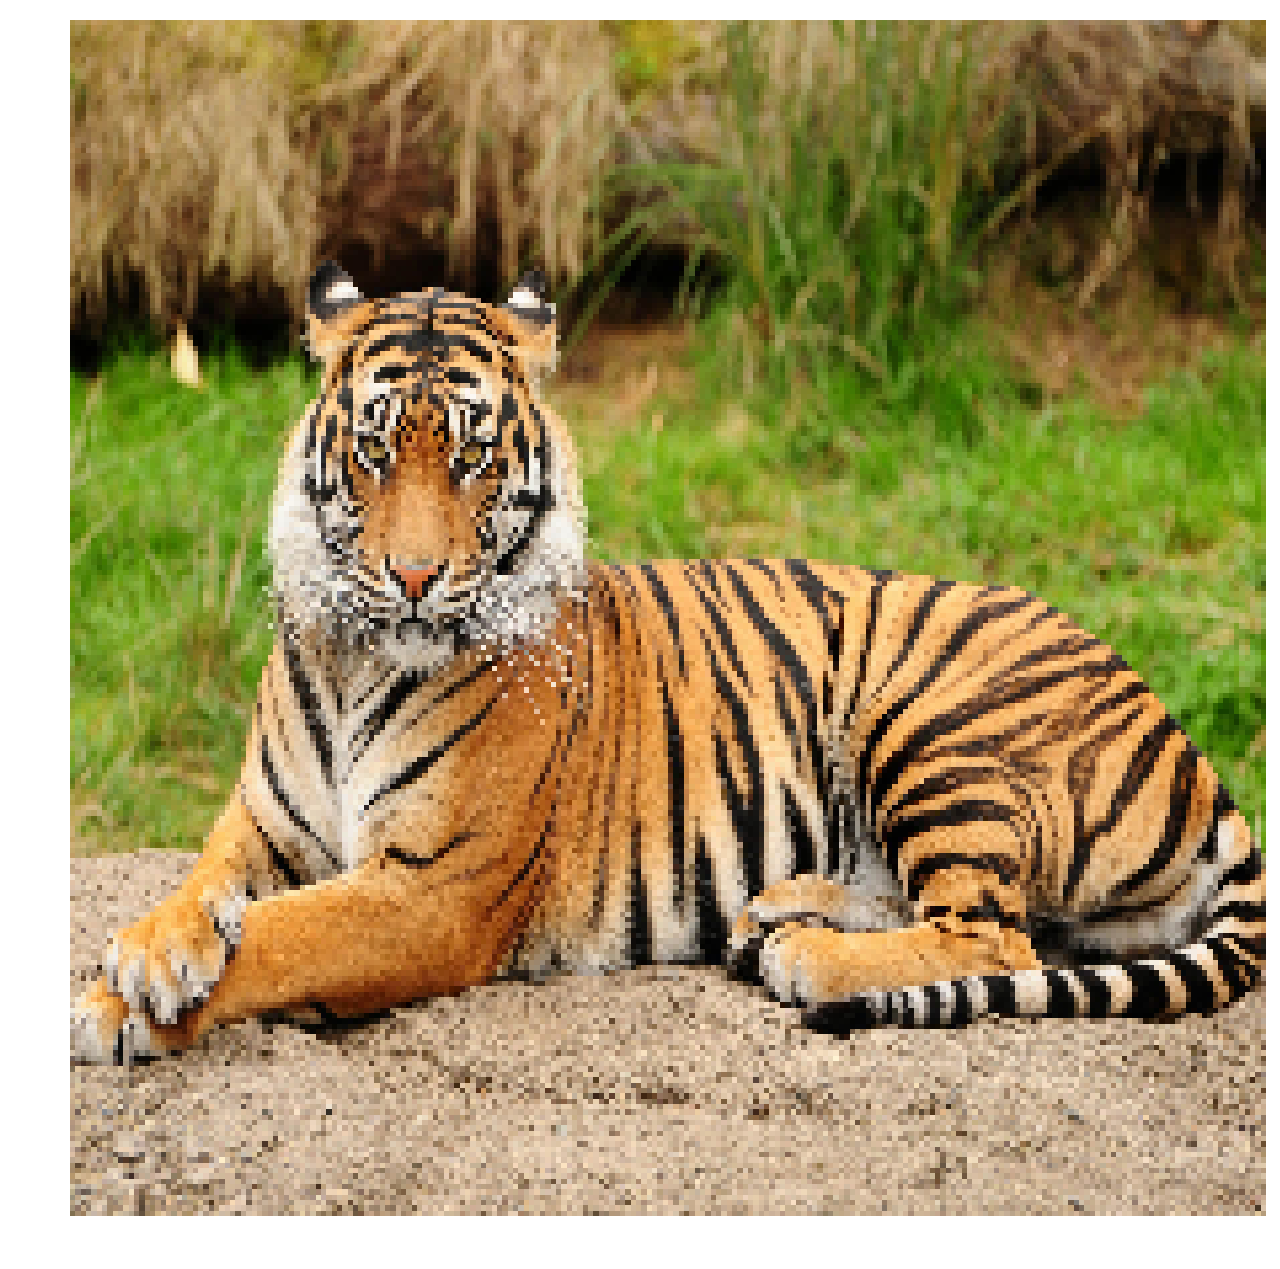

In [4]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2
import time 

img = cv2.imread('10.jpg', -1)

## 모델을 사용할때 테스트 하고자 하는 이미지를 244 x 244 사이즈로 resize해주어야 한다.
img = cv2.resize(img, (224, 224))

start = time.time() 
yhat = resnet.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()